In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way

In [2]:
## import neccessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### library for spliting dataset
from sklearn.model_selection import train_test_split

## machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

## Import your data and perform basic data exploration phase

In [4]:
df = pd.read_csv('Financial_inclusion_dataset.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
#  Create a pandas profiling reports to gain insights into the dataset
## import profilereport libraries

##from ydata_profiling import ProfileReport

In [6]:
### Generate the report

##profile = ProfileReport(df, title = "Financial Inclusion Report")

In [7]:
### Display the report in jupyter notebook

#profile.to_notebook_iframe()

In [8]:
### To generate the profilereport in an HTML file

#profile.to_file("Financial Inclusion Report.html")

In [9]:
# Exploring values in dataset

df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [10]:
df.describe(include=[object]) 

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [12]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [13]:
## Creating copy of original dataset
df_copy = df.copy()

In [14]:
df.shape

(23524, 13)

In [15]:
# Check duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicate rows: 0


In [16]:
df['uniqueid'].value_counts()

uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64

In [17]:
df['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [18]:
df['household_size'].value_counts()

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

In [19]:
df['household_size'].nunique()

20

In [20]:
df['age_of_respondent'].value_counts()

30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: age_of_respondent, Length: 85, dtype: int64

In [21]:
# Drop the 'user_id' column
df = df.drop(['uniqueid'], axis=1, errors='ignore')

In [22]:
from sklearn.preprocessing import LabelEncoder

## intialize labelencoder
year_encoder = LabelEncoder()
country_encoder = LabelEncoder()
bank_account_encoder = LabelEncoder()
location_type_encoder = LabelEncoder()
cellphone_access_encoder = LabelEncoder()
gender_of_respondent_encoder = LabelEncoder()
relationship_with_head_encoder = LabelEncoder()
marital_status_encoder = LabelEncoder()
education_level_encoder = LabelEncoder()
job_type_encoder = LabelEncoder()


# Transforming each column
df["year"] = year_encoder.fit_transform(df["year"])
df["country"] = country_encoder.fit_transform(df["country"])
df["bank_account"] = bank_account_encoder.fit_transform(df["bank_account"])
df["location_type"] = location_type_encoder.fit_transform(df["location_type"])
df["cellphone_access"] = cellphone_access_encoder.fit_transform(df["cellphone_access"])
df["gender_of_respondent"] = gender_of_respondent_encoder.fit_transform(df["gender_of_respondent"])
df["relationship_with_head"] = relationship_with_head_encoder.fit_transform(df["relationship_with_head"])
df["marital_status"] = marital_status_encoder.fit_transform(df["marital_status"])
df["education_level"] = education_level_encoder.fit_transform(df["education_level"])
df["job_type"] = job_type_encoder.fit_transform(df["job_type"])

df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,24,0,5,2,3,9
1,0,2,0,0,0,5,70,0,1,4,0,4
2,0,2,1,1,1,5,26,1,3,3,5,9
3,0,2,0,0,1,5,34,0,1,2,2,3
4,0,2,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,0,0,1,4,48,0,1,0,0,7
23520,3,2,0,0,1,2,27,0,1,3,3,7
23521,3,2,0,0,1,5,27,0,4,4,2,7
23522,3,2,0,1,1,7,30,0,4,0,3,9


In [23]:
# View the assigned number to each category
print("year Mapping:", dict(zip(year_encoder.classes_, range(len(year_encoder.classes_)))))

year Mapping: {2016: 0, 2017: 1, 2018: 2}


In [24]:
# View the assigned number to each category
print("country Mapping:", dict(zip(country_encoder.classes_, range(len(country_encoder.classes_)))))

country Mapping: {'Kenya': 0, 'Rwanda': 1, 'Tanzania': 2, 'Uganda': 3}


In [25]:
# View the assigned number to each category
print("location_type Mapping:", dict(zip(location_type_encoder.classes_, range(len(location_type_encoder.classes_)))))

location_type Mapping: {'Rural': 0, 'Urban': 1}


In [26]:
# View the assigned number to each category
print("cellphone_access Mapping:", dict(zip(cellphone_access_encoder.classes_, range(len(cellphone_access_encoder.classes_)))))

cellphone_access Mapping: {'No': 0, 'Yes': 1}


In [27]:
# View the assigned number to each category
print("gender_of_respondent Mapping:", dict(zip(gender_of_respondent_encoder.classes_, range(len(gender_of_respondent_encoder.classes_)))))

gender_of_respondent Mapping: {'Female': 0, 'Male': 1}


In [28]:
# View the assigned number to each category
print("relationship_with_head Mapping:", dict(zip(relationship_with_head_encoder.classes_, range(len(relationship_with_head_encoder.classes_)))))

relationship_with_head Mapping: {'Child': 0, 'Head of Household': 1, 'Other non-relatives': 2, 'Other relative': 3, 'Parent': 4, 'Spouse': 5}


In [29]:
# View the assigned number to each category
print("marital_status Mapping:", dict(zip(marital_status_encoder.classes_, range(len(marital_status_encoder.classes_)))))

marital_status Mapping: {'Divorced/Seperated': 0, 'Dont know': 1, 'Married/Living together': 2, 'Single/Never Married': 3, 'Widowed': 4}


In [30]:
# View the assigned number to each category
print("education_level Mapping:", dict(zip(education_level_encoder.classes_, range(len(education_level_encoder.classes_)))))

education_level Mapping: {'No formal education': 0, 'Other/Dont know/RTA': 1, 'Primary education': 2, 'Secondary education': 3, 'Tertiary education': 4, 'Vocational/Specialised training': 5}


In [31]:
# View the assigned number to each category
print("job_type Mapping:", dict(zip(job_type_encoder.classes_, range(len(job_type_encoder.classes_)))))

job_type Mapping: {'Dont Know/Refuse to answer': 0, 'Farming and Fishing': 1, 'Formally employed Government': 2, 'Formally employed Private': 3, 'Government Dependent': 4, 'Informally employed': 5, 'No Income': 6, 'Other Income': 7, 'Remittance Dependent': 8, 'Self employed': 9}


In [32]:
## check for correlation
df.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.094991,-0.161362,0.152285,-0.150003,-0.119158,-0.058778,-0.027055,0.130408,0.009282,-0.050706,0.381066
year,-0.094991,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,0.001801,-0.026187,0.173869,0.266323
bank_account,-0.161362,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.152285,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,-0.150003,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.119158,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,-0.058778,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,-0.027055,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,0.130408,0.001801,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,0.009282,-0.026187,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011


<AxesSubplot:>

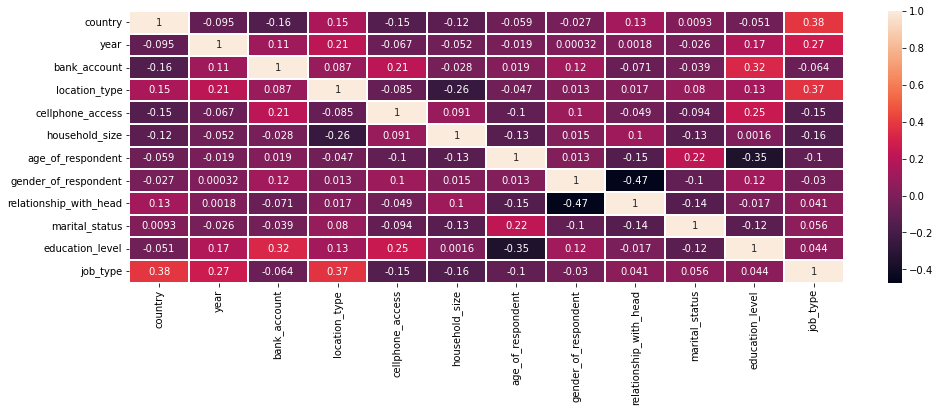

In [33]:
## Heat map showing correlations
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), annot = True, linewidths=.4)

In [34]:
## Visualizing relationships within data set
##sns.pairplot(data=df)

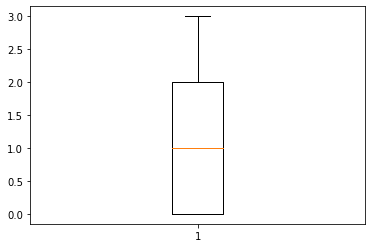

In [35]:
# Checking for outliers
plt.boxplot(df['country'])
plt.show()

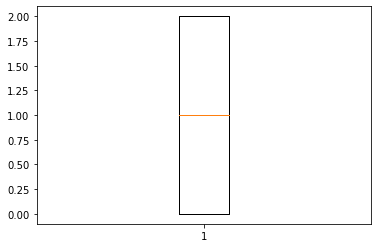

In [36]:
# Checking for outliers
plt.boxplot(df['year'])
plt.show()

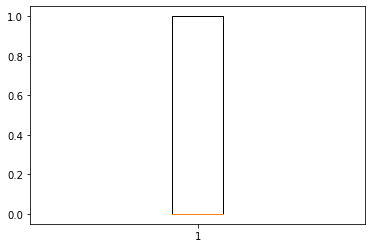

In [37]:
# Checking for outliers
plt.boxplot(df['location_type'])
plt.show()

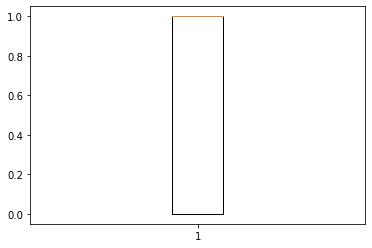

In [38]:
# Checking for outliers
plt.boxplot(df['cellphone_access'])
plt.show()

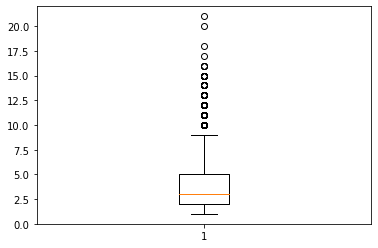

In [39]:
# Checking for outliers
plt.boxplot(df['household_size'])
plt.show()

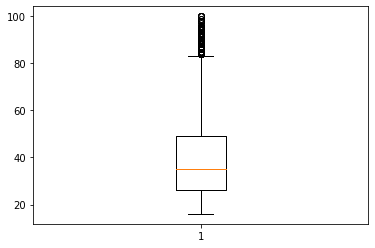

In [40]:
# Checking for outliers
plt.boxplot(df['age_of_respondent'])
plt.show()

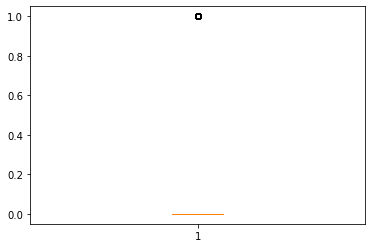

In [41]:
# Checking for outliers
plt.boxplot(df['bank_account'])
plt.show()

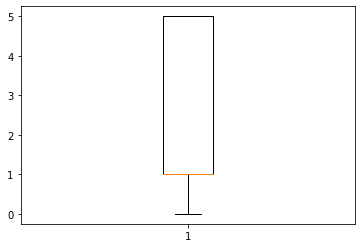

In [42]:
# Checking for outliers
plt.boxplot(df['relationship_with_head'])
plt.show()

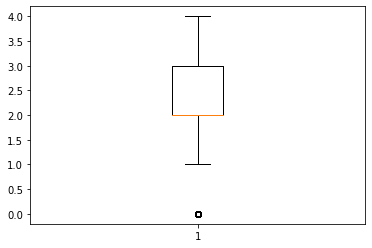

In [43]:
# Checking for outliers
plt.boxplot(df['marital_status'])
plt.show()

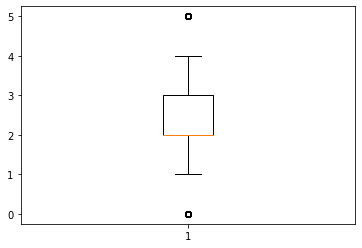

In [44]:
# Checking for outliers
plt.boxplot(df['education_level'])
plt.show()

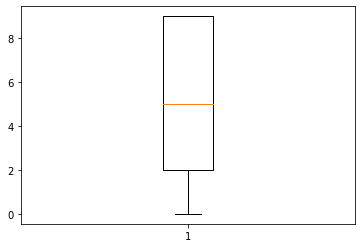

In [45]:
# Checking for outliers
plt.boxplot(df['job_type'])
plt.show()

#### There are few outliers in the dataset

## Supervised Learning Classification

In [48]:
# Select relevant features (x) and target (y)
y = df['bank_account']
x = df.drop(['bank_account'], axis=1, errors='ignore')

print(x)
print(y)

       country  year  location_type  cellphone_access  household_size  \
0            0     2              0                 1               3   
1            0     2              0                 0               5   
2            0     2              1                 1               5   
3            0     2              0                 1               5   
4            0     2              1                 0               8   
...        ...   ...            ...               ...             ...   
23519        3     2              0                 1               4   
23520        3     2              0                 1               2   
23521        3     2              0                 1               5   
23522        3     2              1                 1               7   
23523        3     2              0                 1              10   

       age_of_respondent  gender_of_respondent  relationship_with_head  \
0                     24                     0   

In [49]:
x.shape

(23524, 11)

In [50]:
y.shape

(23524,)

In [51]:
y= pd.DataFrame(y, columns=['bank_account'])

In [52]:
print(y.shape)
print(y)

(23524, 1)
       bank_account
0                 1
1                 0
2                 1
3                 0
4                 0
...             ...
23519             0
23520             0
23521             0
23522             0
23523             0

[23524 rows x 1 columns]


In [53]:
# Split your dataset to training and test sets

#splitting data with test size of 20%

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state = 20)

#### Logistic Regression Code

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#build our logistic model
logreg = LogisticRegression()

#fitting training data
logreg.fit(x_train, y_train)

#testing model’s performance
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8752391073326249


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4036
           1       0.70      0.22      0.33       669

    accuracy                           0.88      4705
   macro avg       0.79      0.60      0.63      4705
weighted avg       0.86      0.88      0.85      4705



In [58]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.88


### K-Nearest Neighbors (KNN) Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
k_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, k_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy}")
print(classification_report(y_test, k_pred))

K-Nearest Neighbors Accuracy: 0.871413390010627
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4036
           1       0.60      0.30      0.40       669

    accuracy                           0.87      4705
   macro avg       0.74      0.63      0.66      4705
weighted avg       0.85      0.87      0.85      4705



### Support Vector Machine (SVM)

In [62]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)
S_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, S_pred)
print(f"SVM Accuracy: {accuracy}")
print(classification_report(y_test, S_pred))

SVM Accuracy: 0.8578108395324123
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4036
           1       0.00      0.00      0.00       669

    accuracy                           0.86      4705
   macro avg       0.43      0.50      0.46      4705
weighted avg       0.74      0.86      0.79      4705



### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
D_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, D_pred)
print(f"Decision Tree Accuracy: {accuracy}")
print(classification_report(y_test, D_pred))

Decision Tree Accuracy: 0.8384697130712009
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4036
           1       0.43      0.42      0.43       669

    accuracy                           0.84      4705
   macro avg       0.67      0.67      0.67      4705
weighted avg       0.84      0.84      0.84      4705



### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
R_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, R_pred)
print(f"Random Forest Accuracy: {accuracy}")
print(classification_report(y_test, R_pred))

Random Forest Accuracy: 0.869500531349628
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4036
           1       0.56      0.41      0.47       669

    accuracy                           0.87      4705
   macro avg       0.73      0.68      0.70      4705
weighted avg       0.86      0.87      0.86      4705



### Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(x_train, y_train)
G_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, G_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")
print(classification_report(y_test, G_pred))

Gradient Boosting Accuracy: 0.8890541976620616
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4036
           1       0.74      0.34      0.47       669

    accuracy                           0.89      4705
   macro avg       0.82      0.66      0.70      4705
weighted avg       0.88      0.89      0.87      4705



In [69]:
import pickle
with open ("Financial Inclusion GradBoostmodel.pkl","wb") as file:
    pickle.dump(model,file)

### Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
N_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, N_pred)
print(f"Naive Bayes Accuracy: {accuracy}")
print(classification_report(y_test, N_pred))

Naive Bayes Accuracy: 0.834643995749203
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4036
           1       0.43      0.52      0.47       669

    accuracy                           0.83      4705
   macro avg       0.67      0.70      0.69      4705
weighted avg       0.85      0.83      0.84      4705



### Neural Network (MLP Classifier)

In [73]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
model.fit(x_train, y_train)
N_pred = model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, N_pred)
print(f"Neural Network Accuracy: {accuracy}")
print(classification_report(y_test, N_pred))

Neural Network Accuracy: 0.8805526036131774
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4036
           1       0.67      0.32      0.43       669

    accuracy                           0.88      4705
   macro avg       0.78      0.64      0.68      4705
weighted avg       0.86      0.88      0.86      4705

